# Automatic resume classification

## 1. Data input and pre-processing

We are loading this dataset locally, as a CSV file, and adding a column encoding the category as an integer (categorical variables are often better represented by integers than strings).


In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib as plt

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [148]:
from StringIO import StringIO
df = pd.read_csv("resume.csv")
df['category_id'] = df['category'].factorize()[0]

In [3]:
df.content

0     \n Woodland Hills, CA\n \n • Over 6 years of d...
1     San, Himachal Pradesh\n \n ➢ 8+ years of profe...
2     \n I am an UI/UX designer of 5.8 years' experi...
3     \n Citi Bank - Plano, TX\n May 2015 to Present...
4     \n • Having 8 years of experience in developin...
5     UI Developer - Unique idea Software Technologi...
6     \n Personal information \n \n last update: 3rd...
7     jobs@glob.com.au\n Career Summary\n Senior Jav...
8     Bengaluru, Karnataka\n \n Work Experience\n IB...
9     \n Pune, Maharashtra - Email me on Indeed: ind...
10    \n Sr. Java Developer - KCS\n \n mo - Email me...
11    \n Senior Software Developer, Brovada (Toronto...
12    Nandan Acura Society,\n Baner Road,\n Baner, P...
13    mailsudhir@gmail.com\n Indeed Resume\n what\n ...
14    Software Engineer\n E-mail ID : tushii012@gmai...
15    \n rishabhraj123@gmail.com | +91 9545372959\n ...
16    \n Bengaluru, Karnataka\n \n • Have 4 year of ...
17    Bangalore, Karnataka\n \n Work Experience\

## 2. Data exploration

Before diving head-first into training machine learning models, we should become familiar with the structure and characteristics of our dataset: these properties might inform our problem-solving approach.

A first step would be to look at some random examples, and the number of examples in each class:

In [33]:
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

In [35]:
category_id_df[['category_id', 'category']].values

array([[0, 'frontend_ui'],
       [1, 'java'],
       [2, 'linux_kernel'],
       [3, 'qa_automation']], dtype=object)

In [37]:
print (id_to_category)

{0: 'frontend_ui', 1: 'java', 2: 'linux_kernel', 3: 'qa_automation'}


In [38]:
df.sample(5, random_state=1)

,category,content,filename,title,category_id
3,frontend_ui,"\n Citi Bank - Plano, TX\n May 2015 to Present...",spandana.txt,Angular JS/UI Developer\n,0
16,qa_automation,"\n Bengaluru, Karnataka\n \n • Have 4 year of ...",utkarsh_dixit.txt,QA Automation Engineer\n,3
6,java,\n Personal information \n \n last update: 3rd...,junior_java.txt,curriculum vitae \n,1
10,java,\n Sr. Java Developer - KCS\n \n mo - Email me...,sanosh-java.txt,sanosh java\n,1
2,frontend_ui,\n I am an UI/UX designer of 5.8 years' experi...,sahu.txt,UI/UX Designer - Epic Minds Information Techno...,0


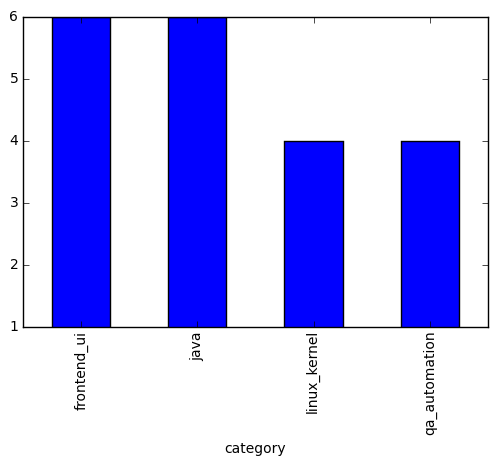

In [39]:
df.groupby('category').filename.count().plot.bar(ylim=1)

In [75]:
import pickle
with open("keyword_conf/keywords.pkl", "rb") as fp:                             
    keywords = pickle.load(fp)
fp.close()

keywords = list(set(keywords))
print keywords

['linux admin', 'restore', 'solaris', 'nosql', 'performance testing', 'ip networking', 'jre', 'rest', 'jboss-ws', 'gdb', 'strace', 'mysql', 'responsive', 'disk', 'xml', 'java gui', 'redhat', 'selenium', 'whatwg', 'quality assurance', 'networking', 'linux system administration', 'junit', 'automation engineering', 'css3', 'python developer', 'crash', 'python', 'web fonts', 'test engineering', 'java developer', 'servlet', 'aix', 'linux', 'dbx', 'gui', 'responsive design', 'c++', 'patch', 'qa', 'nfs', 'redhat linux', 'chrome dev tools', 'arp', 'kernel', 'qtp', 'mdb', 'spring', 'testing', 'kdb', 'design', 'communication skills', 'system administration', 'ldap', 'vmware', 'quality assurance engineering', 'ftp', 'iptables', 'rpm', 'css grids', 'ejb', 'device driver', 'jboss', 'ui prototyping', 'web services', 'dhcp', 'babeljs', 'scada', 'wireframing', 'hibernate', 'dtrace', 'javascript', 'web technologies', 'data structures', 'ajax', 'jdbc', 'plc', 'windows', 'ubuntu', 'smacss', 'ms-sql', 'li

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), 
 #                       vocabulary=['ux', 'ui', 'wireframing', 'coding', 'ux writing', 'ui prototyping', 'html', 'css', 'javascript', 'jquery', 'github', 'css', 'css3', 'ajax', 'php', 'html', 'bootstrap', 'java', 'website', 'webserver', 'angular', 'react', 'responsive', 'gui', 'boilerplate', 'oocss', 'bem', 'smacss', 'css grids', 'css frameworks', 'resets', 'w3c', 'whatwg', 'vue', 'usability', 'chrome dev tools', 'firebug', 'svg', 'web design', 'mobile', 'cross browser', 'dom', 'transpilers', 'babeljs', 'webapp', 'sql', 'mysql', 'nosql', 'mongodb', 'json', 'jsonp', 'xml', 'service workers', 'web fonts', 'frameworks', 'git', 'broswer', 'responsive design', 'java', 'j2ee', 'javascript', 'hibernate', 'core java', 'spring', 'jquery', 'struts', 'xml', 'html', 'web services', 'jsp', 'sql', 'ajax', 'android', 'web technologies', 'css', 'mysql', 'java script', 'php', 'java developer', 'java programmer', 'ejb3', 'jboss', 'jms', 'web services', 'soap', 'rest', 'axis2', 'wso2wsas', 'jboss-ws', 'jpa', 'ms-sql', 'eclipse', 'ant', 'svn', 'servlet', 'jrun', 'jdbc', 'ms-sql', 'java servlet', 'jrun', 'java gui', 'swing', 'jre', 'javascript', 'jsp', 'jsf', 'ejb', 'jpa', 'junit', 'python', 'python developer', 'python automation', 'automation', 'testing', 'django', 'automation testing', 'automation', 'selenium', 'manual testing', 'test engineering', 'qa', 'plc', 'software testing', 'java', 'scada', 'qtp', 'quality assurance', 'quality assurance engineering', 'automation tools', 'perl', 'automation engineering', 'test automation', 'performance testing', 'testing', 'manual testing', 'functional testing', 'gui testing', 'integration testing', 'automation testing', 'qa engineer', 'devops', 'linux', 'system administration', 'linux administration', 'unix', 'networking', 'linux system administration', 'windows', 'mysql', 'solaris', 'redhat linux', 'linux admin', 'perl', 'linux server', 'database administration', 'php', 'ubuntu', 'shell scripting', 'apache', 'dns', 'c', 'c++', 'linux', 'kernel', 'software engineer', 'debugging', 'programming', 'networking', 'device driver', 'c', 'ip networking', 'dns', 'upnp', 'tcp', 'dlna', 'nat', 'arp', 'vlan', 'bash scripting', 'data structures', 'linux kernel', 'software engineering', 'system administration', 'computer science', 'design', 'support', 'communication skills', 'aix', 'vxfs', 'redhat', 'rhel', 'shell', 'bash', 'nfs', 'jfs', 'os', 'operating system', 'os patch', 'lpar', 'volume', 'file system', 'fs', 'backup', 'restore', 'lvm', 'cpu', 'memory', 'disk', 'vmware', 'esx', 'unix', 'centos', 'kvm', 'patch', 'rpm', 'ftp', 'ssh', 'telnet', 'dhcp', 'ldap', 'tftp', 'snmp', 'iptables', 'oracle rac', 'cli', 'kdb', 'dbx', 'crash', 'mdb', 'gdb', 'strace', 'dtrace', 'cvs', 'svn', 'git', 'sles', 'volume manager']
#)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), 
                        stop_words='english')
print tfidf
features = tfidf.fit_transform(df.content)
features = tfidf.fit_transform(df.content).toarray()
labels = df.category_id
features
tfidf

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding='latin-1', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=True,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)


TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding='latin-1', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=True,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [73]:
print (labels)

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    1
11    1
12    2
13    2
14    2
15    2
16    3
17    3
18    3
19    3
Name: category_id, dtype: int64


In [92]:
import numpy as np
from sklearn.feature_selection import chi2

N = 4
for category, category_id in sorted(category_to_id.iteritems()):
  print(category, category_id)  
  features_chi2 = chi2(features, labels == category_id)
  #print (features_chi2) 
  indices = np.argsort(features_chi2[0])
  #print (indices)  
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(category))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

('frontend_ui', 0)
# 'frontend_ui':
  . Most correlated unigrams:
       . ajax
       . jquery
       . bootstrap
       . ui
  . Most correlated bigrams:
       . jquery ajax
       . html5 css3
       . javascript jquery
       . ui developer
('java', 1)
# 'java':
  . Most correlated unigrams:
       . ant
       . j2ee
       . spring
       . hibernate
  . Most correlated bigrams:
       . java j2ee
       . spring mvc
       . oracle database
       . java developer
('linux_kernel', 2)
# 'linux_kernel':
  . Most correlated unigrams:
       . gmail
       . aix
       . solaris
       . kernel
  . Most correlated bigrams:
       . experience working
       . linux unix
       . gmail com
       . software engineer
('qa_automation', 3)
# 'qa_automation':
  . Most correlated unigrams:
       . qa
       . automation
       . selenium
       . manual
  . Most correlated bigrams:
       . pune maharashtra
       . test cases
       . integration testing
       . life cycle


In [93]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Sampling a subset of our dataset because t-SNE is computationally expensive
#SAMPLE_SIZE = int(len(features) * 0.3)
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])
projected_features

array([[  1.75345607e-04,   4.02487418e-05],
       [  9.79335906e-05,   2.21419902e-04],
       [  1.85283413e-04,  -9.50895983e-05],
       [  9.49910170e-05,  -1.44250154e-05],
       [ -8.64179874e-06,   4.09490118e-05],
       [  1.49311579e-05,   1.44478863e-04]])

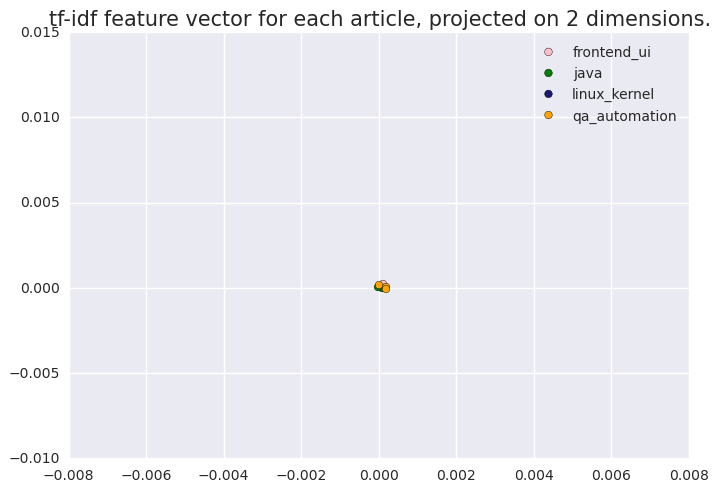

In [144]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Sampling a subset of our dataset because t-SNE is computationally expensive
#SAMPLE_SIZE = int(len(features) * 0.3)
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']
for category, category_id in sorted(category_to_id.iteritems()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

In [141]:
df[df.content.str.contains('css')]

,category,content,filename,title,category_id
1,frontend_ui,"San, Himachal Pradesh\n \n ➢ 8+ years of profe...",saidi_reddy.txt,UI Developer (Angular5.0+CLI SASS) - KIPP\n,0


## 3. Model training and evaluation

### Model evaluation
One common mistake when evaluating a model is to train and test it on the same dataset: this is problematic because you this will not evaluate how well the model works in realistic conditions, on unseen data, and models that overfit to the data will seem to perform better. 

It is common practice to split the data in three parts:
1. A training set that the model will be trained on.
1. A validation set used for finding the optimal parameters (as discussed previously).
1. A test set to evaluate the model’s performance.

Since we are not performing a hyperparameter search, we will only use a train/test split.

To evaluate each model, we will use the K-fold cross-validation technique: iteratively training the model on different subsets of the data, and testing against the held-out data. scikit-learn provides a utility function, `cross_val_score`, that allows us to run this operation in a single line of code!

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [97]:
cv_df



,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,1.00
1,RandomForestClassifier,1,0.75
2,RandomForestClassifier,2,1.00
3,RandomForestClassifier,3,0.75
4,RandomForestClassifier,4,1.00
5,MultinomialNB,0,1.00
6,MultinomialNB,1,0.75
7,MultinomialNB,2,0.75
8,MultinomialNB,3,0.25
9,MultinomialNB,4,1.00


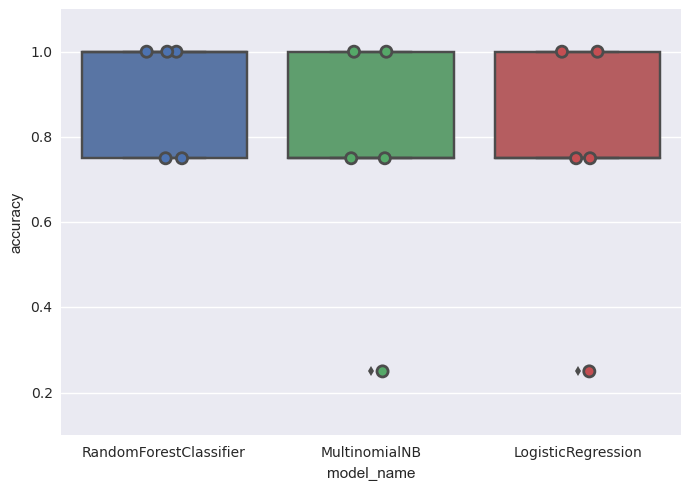

In [98]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [99]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.75
MultinomialNB             0.75
RandomForestClassifier    0.90
Name: accuracy, dtype: float64

The results for the `RandomForest` model show a large variance, the sign of a model that is overfitting to its training data. Running cross-validation is vital, because results from a single train/test split might be misleading.
We also notice that both `MultinomialNB` (Naive Bayes) and `LogisticRegression` perform extremely well, with `LogisticRegression` having a slight advantage with a median accuracy of around 97%!
With such results, we could just pack our things and consider the task complete, but it’s good to apply a healthy dose of skepticism especially when results are this good.

### 4. Model interpretation

It is insufficient to have a model that performs well according to a given metric: we must also have a model that we can understand and whose results we can explain.

We will start by training our model on part of the dataset, and then analyze the main sources of misclassification on the test set. One way to eliminate sources of error is to look at the confusion matrix, a matrix used to show the discrepancies between predicted and actual labels.

In [115]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0, random_state=0)
model.fit(X_train, y_train)
#y_pred_proba = model.predict_proba(X_test)
#y_pred = model.predict(X_test)

#

## We should not do this at all, but I am doing it because we have very few datasets##########

X_test = X_train
y_test = y_train




In [118]:
X_test = X_train 
y_test = y_train

y_pred_proba = model.predict_proba(X_test) 
y_pred = model.predict(X_test)

## Please note!!!!!!
Because of very few datasets, confusion matrix will be BAD. Do not trust this

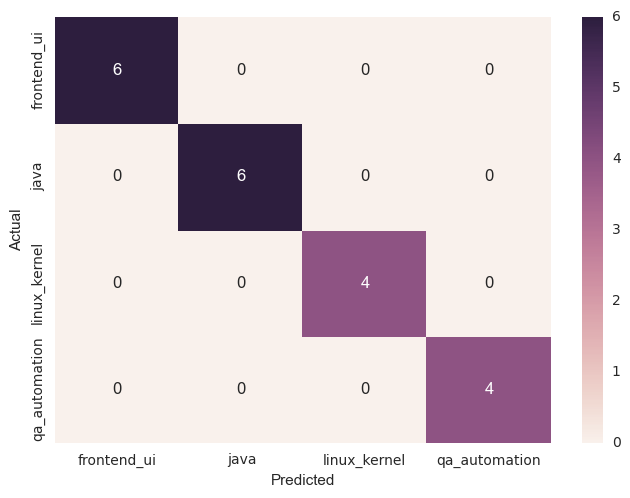

In [119]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Given the extremely high accuracy of our model, the vast majority of the predictions end up on the diagonal (predicted label = actual label), where we want them to be! However, there are a number of misclassifications, and it might be interesting to see what those are caused by:

In [120]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 2:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['title', 'content']])
      print('')

As can be seen above, the misclassified articles are articles that touch on different subjects (for example, articles involving both politics and business) and might hence even be missclassified by humans. This sort of errors will always happen, and it is unrealistic to aim for a model that achieves 100% accuracy.

We can also look deeper inside the model and how it works, by finding which terms contribute the most to a document being classified in each of the categories:

In [121]:
model.fit(features, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [125]:
from sklearn.feature_selection import chi2

N = 5
for category, category_id in sorted(category_to_id.iteritems()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(category))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'frontend_ui':
  . Top unigrams:
       . ui
       . bootstrap
       . jquery
       . ajax
       . js
  . Top bigrams:
       . javascript jquery
       . ui developer
       . html5 css3
       . using html
       . angular js
# 'java':
  . Top unigrams:
       . spring
       . hibernate
       . developer
       . jsp
       . j2ee
  . Top bigrams:
       . java developer
       . oracle database
       . spring mvc
       . core java
       . web services
# 'linux_kernel':
  . Top unigrams:
       . solaris
       . kernel
       . aix
       . linux
       . support
  . Top bigrams:
       . software engineer
       . gmail com
       . linux unix
       . experience working
       . shell scripting
# 'qa_automation':
  . Top unigrams:
       . automation
       . selenium
       . manual
       . testing
       . qa
  . Top bigrams:
       . life cycle
       . pune maharashtra
       . test cases
       . integration testing
       . ability work


In [105]:
df[df.content.str.lower().str.contains('news website')].category.value_counts()

Series([], Name: category, dtype: int64)

In [139]:
texts = ["Company Projects Project Name:- Salary Management Client: - Staff Management Environment:- Core Java, Advanced Java Servlets, JSP, JDBC, Java Beans, Log4j, Web Services-RestFul,My-SQL, Jquery, javaScript Role:- Develop, test, implement and maintain application software. Discription: - It Is Used By The Company/ Organisation Staff Management When Staff Join, Resign, Payment Distribute, Attendance Making, Employee Promotion and Demotion, Leave Employee Check Close Leave (CL) Check, Travelleng Allownce (TA) Report etc.Responsibilities: - Conduct software analysis, programming, testing and debugging Project Name:- School Management Client: - Modern Public School Environment:- Core Java, Advanced Java-Servlets, JSP, JDBC, Java Beans, Spring IOC & MVC, Log4j, Web Services-RestFul, Eclipse IDE, SQL, Hibernate, Jquery, javaScript, Role:- Develop And maintain application software. Discription: - It Is Used By The School Management Staff When Student Registration, Exam, Fee Submit, Attendance Making, Report Card Making and Bulk Sms Sending etc Responsibilities: - Conduct software analysis, programming, testing and debugging"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print ("\n\n")  
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"Company Projects Project Name:- Salary Management Client: - Staff Management Environment:- Core Java, Advanced Java Servlets, JSP, JDBC, Java Beans, Log4j, Web Services-RestFul,My-SQL, Jquery, javaScript Role:- Develop, test, implement and maintain application software. Discription: - It Is Used By The Company/ Organisation Staff Management When Staff Join, Resign, Payment Distribute, Attendance Making, Employee Promotion and Demotion, Leave Employee Check Close Leave (CL) Check, Travelleng Allownce (TA) Report etc.Responsibilities: - Conduct software analysis, programming, testing and debugging Project Name:- School Management Client: - Modern Public School Environment:- Core Java, Advanced Java-Servlets, JSP, JDBC, Java Beans, Spring IOC & MVC, Log4j, Web Services-RestFul, Eclipse IDE, SQL, Hibernate, Jquery, javaScript, Role:- Develop And maintain application software. Discription: - It Is Used By The School Management Staff When Student Registration, Exam, Fee Submit, Attendance M

## Resume classification is done

## Some rough work

In [27]:
tags = [                                                                        
  "python, tools",                                                              
  "linux, tools, ubuntu",                                                       
  "distributed systems, linux, networking, tools",                              
]                                                                               
                                                                                
from sklearn.feature_extraction.text import CountVectorizer                     
vec = CountVectorizer()                                                         



In [28]:
corpus = [
'This is the first document.',
'This is the second second document.',
'And the third one.',
'Is this the first document?',
]

from sklearn.feature_extraction.text import CountVectorizer 
#vec = CountVectorizer(lowercase=True, stop_words='english')
vec = CountVectorizer(lowercase=True, vocabulary=['first', 'second', 'third'])
X = vec.fit_transform(corpus)

vec.get_feature_names()
vec.get_stop_words()
vec.vocabulary_


{'first': 0, 'second': 1, 'third': 2}

In [28]:
import pickle
with open("keyword_conf/keywords.pkl", "rb") as fp:                             
    keywords = pickle.load(fp)
fp.close()
keywords=['first', 'second']

In [151]:
corpus = [
'This is the first document.',
'This is the second second document.',
'And the third one.',
'Is this the first document?',
]

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=1, encoding='latin-1', ngram_range=(1, 2), vocabulary=keywords)

print (corpus)
print (tfidf)
features = tfidf.fit_transform(corpus)

print(features.toarray()[1])


['This is the first document.', 'This is the second second document.', 'And the third one.', 'Is this the first document?']
TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding='latin-1', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=['linux admin', 'restore', 'solaris', 'nosql', 'performance testing', 'ip networking', 'jre', 'rest', 'jboss-ws', 'gdb', 'strace', 'mysql', 'responsive', 'disk', 'xml', 'java gui', 'redhat', 'selenium', 'whatwg', 'quality assurance', 'networking', 'linux system administration', 'junit', '...ring', 'dom', 'mobile', 'svg', 'bootstrap', 'qa engineer', 'django', 'volume manager', 'cpu', 'ssh'])
[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 